In [1]:
from control_solver import fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/omarafifi/MyFolders/Differential-Game-Theory-for-SIR-Models/Data/_normalized.csv", index_col = 0)
S, I, R = data['S'].to_numpy(), data['I'].to_numpy(),  data['R'].to_numpy()
S_0, I_0, R_0, V_0  = float(S[0]), float(I[0]), float(R[0]), 1
iB, ig, m_0 = .1, .1, 2.3
N = 1
p_0 = [iB, ig, S_0, I_0, R_0, V_0]

In [2]:
# from control_model import control_model
# import torch

# p_0 = torch.tensor(p_0, dtype = torch.float32)
# m = torch.tensor(m_0, dtype = torch.float32)

# model = control_model(θ = p_0, m = m, time_steps = 15)


In [3]:
X, model = fit(p_0, 
        m_0, 
        data.to_numpy(), 
        epochs = 200, 
        lr = .001)

Parameter containing:
tensor(2.3000, requires_grad=True)


/opt/anaconda3/lib/python3.12/site-packages/torchdiffeq/_impl/misc.py:15: UserWarning: Dopri5Solver: Unexpected arguments {'step_size': 0.001}
  warnings.warn('{}: Unexpected arguments {}'.format(solver.__class__.__name__, unused_kwargs))


p = Parameter containing:
tensor([0.1010, 0.0990, 0.8572, 0.0457, 0.0966, 1.0005], requires_grad=True), Parameter containing:
tensor(2.3000, requires_grad=True)
Loss 0 = 0.03448455408215523
Parameter containing:
tensor(2.3000, requires_grad=True)
p = Parameter containing:
tensor([0.1020, 0.0980, 0.8566, 0.0467, 0.0957, 1.0010], requires_grad=True), Parameter containing:
tensor(2.3000, requires_grad=True)
Loss 1 = 0.03248784691095352
Parameter containing:
tensor(2.3000, requires_grad=True)
p = Parameter containing:
tensor([0.1030, 0.0970, 0.8560, 0.0477, 0.0947, 1.0015], requires_grad=True), Parameter containing:
tensor(2.3000, requires_grad=True)
Loss 2 = 0.030478065833449364
Parameter containing:
tensor(2.3000, requires_grad=True)
p = Parameter containing:
tensor([0.1040, 0.0960, 0.8555, 0.0488, 0.0938, 1.0020], requires_grad=True), Parameter containing:
tensor(2.3000, requires_grad=True)
Loss 3 = 0.028470242395997047
Parameter containing:
tensor(2.3000, requires_grad=True)
p = Parame

<Figure size 400x400 with 0 Axes>

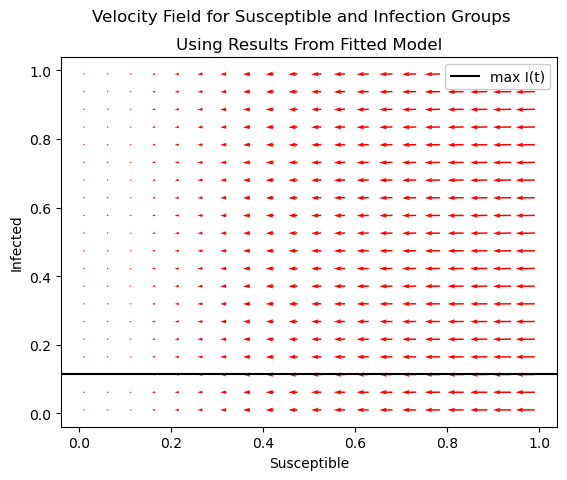

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))

SIRV = np.vstack ((np.linspace(0.01,.99, 20), 
                   np.linspace(0.01,.99, 20), 
                   np.zeros(20), 
                   np.zeros(20) )).T


dV = np.array( [model.forward(X = x_t, t = 0).detach() for x_t in SIRV] )
dVS = dV[:, 0]
dVI = dV[:, 1]
dVS, dVI = np.meshgrid(dVS, dVI)



fig, ax = plt.subplots()
x_coord, y_coord = np.meshgrid(np.linspace(0.01,.99, 20), np.linspace(0.01,.99, 20))
ax.quiver(  x_coord, 
            y_coord,
            dVS, 
            dVI,
            angles='xy',
            scale=1.2, 
            color='r')

# Labeling the axes and the plot
plt.xlabel('Susceptible')
plt.ylabel('Infected')
plt.suptitle('Velocity Field for Susceptible and Infection Groups')
ax.set_title('Using Results From Fitted Model')
plt.axhline(y=max(X[:,1].detach()), label = "max I(t)", c = 'black')
plt.legend(framealpha=1)
plt.show()
plt.savefig("/Users/omarafifi/MyFolders/Differential-Game-Theory-for-SIR-Models/Images/fitted_VF.png")

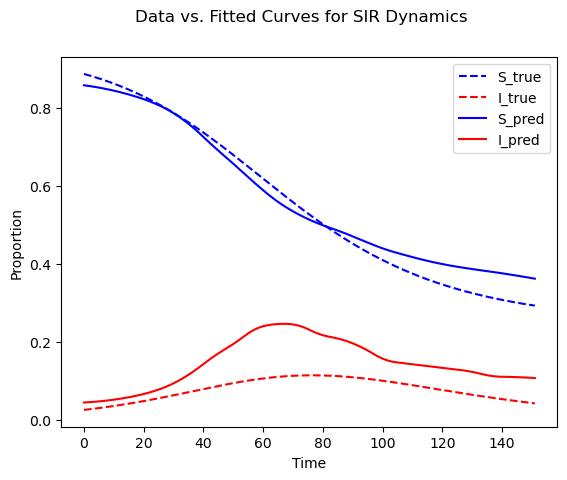

In [5]:

plt.plot(X[:,0].detach(), linestyle='--', color = 'blue', label = "S_true" )
plt.plot(X[:,1].detach(), linestyle='--', color = 'red', label = "I_true" )
plt.plot(data.to_numpy()[:,0], color = 'blue', label = "S_pred" )
plt.plot(data.to_numpy()[:,1], color = 'red', label = "I_pred" )


plt.xlabel('Time')
plt.ylabel('Proportion')
plt.suptitle('Data vs. Fitted Curves for SIR Dynamics')
#ax.set_title('Using Results From Fitted Model')
#plt.axhline(y=max(X[:,1]))
plt.savefig("/Users/omarafifi/MyFolders/Differential-Game-Theory-for-SIR-Models/Images/fitted_Curves.png")
plt.legend()
plt.show()
#plt.set_facecolor('lightgrey')